In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
desc = pd.read_excel('../data/multi_asset_etf_data.xlsx')
excess_returns = pd.read_excel('../data/multi_asset_etf_data.xlsx', sheet_name = 'excess returns')
desc

,ticker,shortName,quoteType,currency,volume,totalAssets,longBusinessSummary
0,SPY,SPDR S&P 500,ETF,USD,48833086,566341992448,The Trust seeks to achieve its investment obje...
1,EFA,iShares MSCI EAFE ETF,ETF,USD,11332778,57923706880,The fund generally will invest at least 80% of...
2,EEM,iShares MSCI Emerging Index Fun,ETF,USD,23583292,17685696512,The fund generally will invest at least 80% of...
3,PSP,Invesco Global Listed Private E,ETF,USD,9989,248054672,The fund generally will invest at least 90% of...
4,QAI,NYLI Hedge Multi-Strategy Track,ETF,USD,66176,574961600,"The fund is a ""fund of funds"" which means it i..."
5,HYG,iShares iBoxx $ High Yield Corp,ETF,USD,31335696,16903942144,The underlying index is a rules-based index co...
6,DBC,Invesco DB Commodity Index Trac,ETF,USD,816794,1496658176,The fund pursues its investment objective by i...
7,IYR,iShares U.S. Real Estate ETF,ETF,USD,3310338,4560725504,The fund seeks to track the investment results...
8,IEF,iShares 7-10 Year Treasury Bond,ETF,USD,7913316,31752601600,The underlying index measures the performance ...
9,BWX,SPDR Bloomberg International Tr,ETF,USD,138010,1028062656,"The fund generally invests substantially all, ..."


EFA: iShares MSCI EAFE ETF - large and mid-capitalization equity market performance of developed markets outside of the U.S. and Canada
PSP: Invesco Preferred Securities ETF - global small/mid stock ETF

In [3]:
returns = pd.DataFrame(columns = [col for col in excess_returns if col!='Date'])
returns.loc['mean'] = excess_returns.drop(['Date'], axis = 1).mean()
returns.loc['std'] = excess_returns.drop(['Date'], axis = 1).std()

returns.loc['mean'] *=12
returns.loc['std'] *= np.sqrt(12)
returns


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
mean,-0.011888,-0.009086,0.02696,0.055037,0.037356,0.013939,0.077912,0.092851,0.014959,0.126983,0.016844
std,0.081671,0.168455,0.17994,0.152203,0.077289,0.063197,0.169585,0.215238,0.049007,0.143066,0.051258


In [4]:
returns.loc['sharpe'] = returns.loc['mean']/returns.loc['std']
returns

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
mean,-0.011888,-0.009086,0.026960,0.055037,0.037356,0.013939,0.077912,0.092851,0.014959,0.126983,0.016844
std,0.081671,0.168455,0.179940,0.152203,0.077289,0.063197,0.169585,0.215238,0.049007,0.143066,0.051258
sharpe,-0.145563,-0.053935,0.149829,0.361605,0.483335,0.220561,0.459426,0.431386,0.305241,0.887578,0.328618


In [5]:
best_sharpe, best_asset = max(returns.loc['sharpe']), returns.loc['sharpe'].idxmax()
worst_sharpe, worst_asset = min(returns.loc['sharpe']), returns.loc['sharpe'].idxmin()
print(f'Best Sharpe: {best_sharpe} by {best_asset}')
print(f'Worst Sharpe: {worst_sharpe} by {worst_asset}')

Best Sharpe: 0.8875780193539922 by SPY
Worst Sharpe: -0.14556321071253242 by BWX


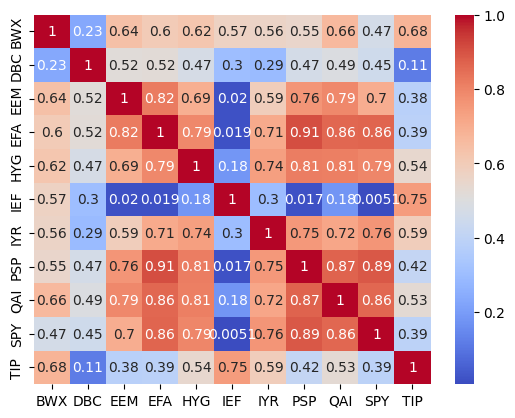

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
BWX,1.000000,0.233222,0.638705,0.600620,0.620946,0.568903,0.562599,0.552010,0.662425,0.466152,0.680001
DBC,0.233222,1.000000,0.516908,0.521447,0.471924,-0.300523,0.290040,0.467111,0.494467,0.448389,0.114379
EEM,0.638705,0.516908,1.000000,0.820770,0.694174,0.020477,0.589003,0.761796,0.791130,0.699939,0.379465
EFA,0.600620,0.521447,0.820770,1.000000,0.790742,0.018537,0.705926,0.910596,0.863957,0.864822,0.386677
HYG,0.620946,0.471924,0.694174,0.790742,1.000000,0.180087,0.739567,0.814182,0.811161,0.794782,0.541758
IEF,0.568903,-0.300523,0.020477,0.018537,0.180087,1.000000,0.297047,0.017486,0.176287,-0.005053,0.745025
IYR,0.562599,0.290040,0.589003,0.705926,0.739567,0.297047,1.000000,0.753810,0.718397,0.760646,0.590805
PSP,0.552010,0.467111,0.761796,0.910596,0.814182,0.017486,0.753810,1.000000,0.870673,0.890719,0.415854
QAI,0.662425,0.494467,0.791130,0.863957,0.811161,0.176287,0.718397,0.870673,1.000000,0.862479,0.527724
SPY,0.466152,0.448389,0.699939,0.864822,0.794782,-0.005053,0.760646,0.890719,0.862479,1.000000,0.393647


In [6]:
corr_mat = excess_returns.drop('Date', axis=1).corr()
sns.heatmap(abs(corr_mat), annot=True, cmap='coolwarm')
plt.show()
corr_mat

# How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?

Evaluating TIPS Performance (TIP)

To assess how TIPS (iShares TIPS Bond ETF) have performed relative to other bond ETFs, we can look at its correlations with:

IEF: iShares Intermediate Treasury Bond ETF
HYG: iShares iBoxx High Yield Corporate Bond ETF
Key Observations:

IEF (Intermediate Treasury Bonds): The correlation between TIP and IEF is 0.745025. This suggests a strong positive correlation, indicating that TIPS have generally moved in line with intermediate-term Treasury bonds.
HYG (High Yield Corporate Bonds): The correlation between TIP and HYG is 0.541758. This suggests a moderate positive correlation, indicating that TIPS have a somewhat positive relationship with high-yield corporate bonds.
Conclusion:

Based on the correlation matrix, we can conclude that:

TIPS have performed similarly to intermediate-term Treasury bonds. This is expected, as TIPS are inflation-protected Treasury bonds.
TIPS have had a less strong relationship with high-yield corporate bonds. This suggests that TIPS may offer some diversification benefits compared to corporate bonds, as they are less sensitive to credit risk.


In [7]:
max_corr = -1
for i in range(len(corr_mat)):
    for j in range(len(corr_mat)):
        if i!=j and corr_mat.iloc[i,j] > max_corr:
            max_corr = corr_mat.iloc[i,j]
            rowmax, colmax = corr_mat.index[i], corr_mat.index[j]
min_corr = 1
for i in range(len(corr_mat)):
    for j in range(len(corr_mat)):
        if i!=j and abs(corr_mat.iloc[i,j]) < min_corr:
            min_corr = corr_mat.iloc[i,j]
            rowmin, colmin = corr_mat.index[i], corr_mat.index[j]


print(f'Max Correlation is {max_corr} by {rowmax} and {colmax}')
print(f'Min Correlation is {min_corr} by {rowmin} and {colmin}')

Max Correlation is 0.9105956995777845 by EFA and PSP
Min Correlation is -0.005053437766112713 by IEF and SPY


In [8]:
cov_mat = excess_returns.drop('Date', axis=1).cov()
inv_cov_mat = np.linalg.inv(cov_mat)
scaling = 1/(np.transpose(np.ones(cov_mat.shape[0])) @ inv_cov_mat @ returns.loc['mean'])
tan_ret = scaling*(inv_cov_mat @ returns.loc['mean']) 

tan_w = pd.DataFrame(data = tan_ret.reshape(1,-1) ,columns =[col for col in excess_returns if col!='Date'], index=['tangency weight'])

# tan_w = pd.DataFrame(data = tan_return.reshape(-1,1) ,index =[col for col in excess_returns if col!='Date'], columns=['tangency weight'])
tan_w

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
tangency weight,2.730253,-0.111241,-0.615698,0.530692,-0.832578,-4.68248,0.877108,0.277002,7.220592,-4.904086,0.510436


In [9]:
returns = pd.concat([returns, tan_w], axis=0)
# returns.loc['weights'] = tan_w.T
returns

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
mean,-0.011888,-0.009086,0.026960,0.055037,0.037356,0.013939,0.077912,0.092851,0.014959,0.126983,0.016844
std,0.081671,0.168455,0.179940,0.152203,0.077289,0.063197,0.169585,0.215238,0.049007,0.143066,0.051258
sharpe,-0.145563,-0.053935,0.149829,0.361605,0.483335,0.220561,0.459426,0.431386,0.305241,0.887578,0.328618
tangency weight,2.730253,-0.111241,-0.615698,0.530692,-0.832578,-4.682480,0.877108,0.277002,7.220592,-4.904086,0.510436


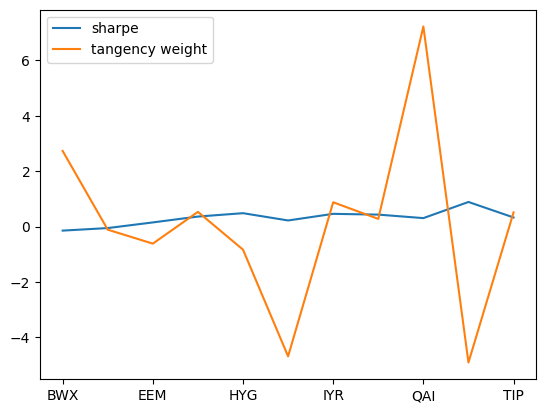

In [10]:
import matplotlib.pyplot as plt
returns.iloc[2:].T.plot()
plt.show()

In [11]:
# print(returns.loc['mean'].shape, tan_w.shape)
p_mean = returns.loc['mean'] @ tan_w.T 
print(f'The portfolio mean of excess return is {p_mean.values[0]}')

The portfolio mean of excess return is -0.5272759704595058


In [12]:
regression = 1/np.sqrt((returns.loc['mean'].T @ inv_cov_mat @ returns.loc['mean']))
p_vol = abs(p_mean)*regression
print(f'The portfolio volatility is {p_vol.values[0]}')

The portfolio volatility is 0.09483363089786948


In [13]:
p_sharpe = p_mean/p_vol
print(f'The portfolio sharpe ratio is {p_sharpe.values[0]}')

The portfolio sharpe ratio is -5.560010362013372


#### Without TIPS

In [14]:
no_tip_cov_mat = excess_returns.drop(['Date', 'TIP'], axis=1).cov()
no_tip_inv_cov_mat = np.linalg.inv(no_tip_cov_mat)
no_tip_scaling = 1/(np.transpose(np.ones(no_tip_cov_mat.shape[0])) @ no_tip_inv_cov_mat @ returns.loc['mean'][:-1])
no_tip_tan_ret = scaling*(no_tip_inv_cov_mat @ returns.loc['mean'][:-1]) 

no_tip_tan_w = pd.DataFrame(data = no_tip_tan_ret.reshape(1,-1) ,columns =[col for col in excess_returns if col not in ['Date', 'TIP']], index=['no tip tangency weight'])
no_tip_tan_w

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY
no tip tangency weight,2.734011,-0.082465,-0.602144,0.490075,-0.790165,-4.380698,0.897605,0.294529,7.231302,-4.885521


In [15]:
no_tip_p_mean = returns.loc['mean'][:-1] @ no_tip_tan_w.T 
print(f'The portfolio mean of excess return is {no_tip_p_mean.values[0]}')
no_tip_regression = 1/np.sqrt((returns.loc['mean'][:-1].T @ no_tip_inv_cov_mat @ returns.loc['mean'][:-1]))
no_tip_p_vol = abs(no_tip_p_mean)*no_tip_regression
print(f'The portfolio volatility is {no_tip_p_vol.values[0]}')
no_tip_p_sharpe = no_tip_p_mean/no_tip_p_vol
print(f'The portfolio sharpe ratio is {no_tip_p_sharpe.values[0]}')

The portfolio mean of excess return is -0.5265171882079659
The portfolio volatility is 0.0947653706445436
The portfolio sharpe ratio is -5.5560083248435195


### Equal Weighting

In [16]:

n = len(returns.columns)
ew_tan_w = pd.DataFrame(np.full(n, 1/n), index = excess_returns.columns[1:])

ew_p_mean = returns.loc['mean'] @ ew_tan_w
print(f"The equal weighting portfolio's mean of excess return is {ew_p_mean.values[0]}")

ew_regression = 1/(returns.loc['mean'].T @ inv_cov_mat @ returns.loc['mean'])
ew_p_vol = abs(ew_p_mean)*ew_regression
print(f"The equal weighting portfolio's volatility is {ew_p_vol.values[0]}")

ew_p_sharpe = ew_p_mean/ew_p_vol
print(f"The equal weighting portfolio's sharpe ratio is {ew_p_sharpe.values[0]}")

The equal weighting portfolio's mean of excess return is 0.04016968328376836
The equal weighting portfolio's volatility is 0.0012994129948631522
The equal weighting portfolio's sharpe ratio is 30.913715225696073


### Risk Parity

In [17]:
n = len(returns.columns)
rp = [1/(i*i) for i in returns.loc['std']]
print(f"The risk parity portfolio's weights are {rp}\n")
rp_tan_w = pd.DataFrame(rp, index = excess_returns.columns[1:])

rp_p_mean = returns.loc['mean'] @ rp_tan_w
print(f"The risk parity portfolio's mean of excess return is {rp_p_mean.values[0]}")

rp_regression = 1/(returns.loc['mean'].T @ inv_cov_mat @ returns.loc['mean'])
rp_p_vol = abs(rp_p_mean)*rp_regression
print(f"The risk parity portfolio's volatility is {rp_p_vol.values[0]}")

rp_p_sharpe = rp_p_mean/rp_p_vol
print(f"The risk parity portfolio's sharpe ratio is {rp_p_sharpe.values[0]}")

The risk parity portfolio's weights are [149.92111423714334, 35.23963426679072, 30.884897303630996, 43.16720173785302, 167.4048822178576, 250.38779589781882, 34.77181638106455, 21.585554013636987, 416.37885819960593, 48.85671526565235, 380.6126674025441]

The risk parity portfolio's mean of excess return is 34.406684163009544
The risk parity portfolio's volatility is 1.1129909139620349
The risk parity portfolio's sharpe ratio is 30.913715225696073


### Regularized Cov

In [18]:
reg_mat = (cov_mat+np.diag(np.ones(n)))*1/2

reg_inv_cov_mat = np.linalg.inv(reg_mat)
reg_scaling = 1/(np.transpose(np.ones(reg_mat.shape[0])) @ reg_inv_cov_mat @ returns.loc['mean'])
reg_tan_ret = reg_scaling*(reg_inv_cov_mat @ returns.loc['mean']) 

# print(returns.loc['mean'].shape, reg_tan_ret.shape)

print(f"The regularized portfolio's weights are {reg_tan_ret}\n")
reg_tan_w = pd.DataFrame(data = reg_tan_ret.reshape(1,-1) ,columns =[col for col in excess_returns if col!='Date'])
reg_p_mean = reg_tan_w @ returns.loc['mean'] 
# portfolio_mean = portfolio_mean.values[0] 
print(f"The regularized portfolio's mean of excess return is {reg_p_mean.values[0]}")

reg_regression = 1/(returns.loc['mean'].T @ np.linalg.inv(reg_mat) @ returns.loc['mean'])
reg_p_vol = abs(reg_p_mean)*reg_regression
print(f"The regularized portfolio's volatility is {reg_p_vol.values[0]}")


reg_p_sharpe = reg_p_mean/reg_p_vol
print(f"The regularized portfolio's sharpe ratio is {reg_p_sharpe.values[0]}")

The regularized portfolio's weights are [-0.02780306 -0.021699    0.060095    0.12442001  0.08479298  0.03185045
  0.17676023  0.21026767  0.03374827  0.28928329  0.03828415]

The regularized portfolio's mean of excess return is 0.08378591731317914
The regularized portfolio's volatility is 1.1453165677724493
The regularized portfolio's sharpe ratio is 0.07315524778981951
